In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
%matplotlib inline
sns.set_style('darkgrid')

In [0]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
iris['DESCR']
iris['data']
iris['feature_names']
iris['target']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
df=pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

In [0]:
adf=pd.DataFrame(data=iris['target'].reshape(-1,1),columns=['class'])

In [0]:
flower=pd.merge(df,adf,left_index=True,right_index=True)


In [9]:
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


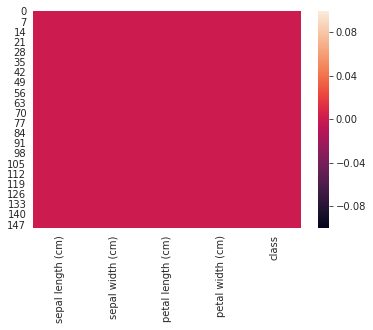

In [11]:
sns.heatmap(flower.isnull())

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


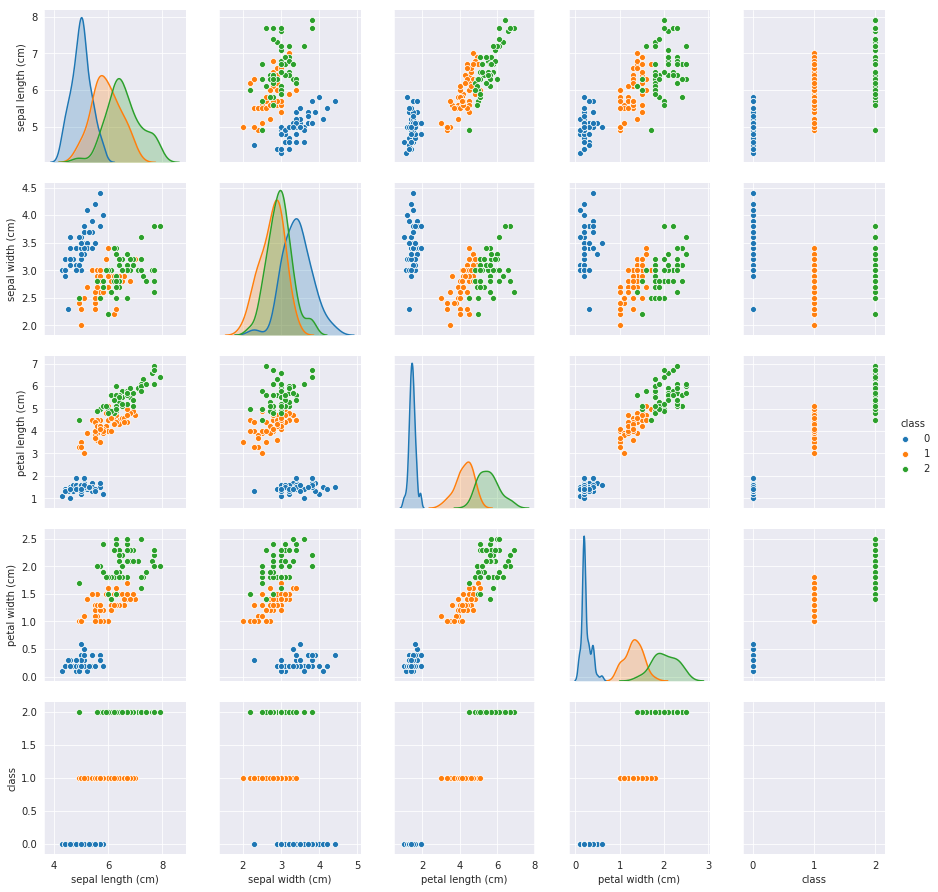

In [12]:
sns.pairplot(flower,hue='class')

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
def class_name(fl):
  if fl==0:
    return 'setosa'
  elif fl==1:
    return 'versicolor'
  else:
    return 'virginia'
  

In [0]:
flower['type']=flower['class'].apply(class_name)

In [0]:
X1=flower.drop('class',axis=1)

In [0]:
X=flower.drop('type',axis=1)

In [0]:
y=flower['class']

In [0]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
cl1=LogisticRegression()
cl1.fit(x1,y1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
cl2=KNeighborsClassifier(n_neighbors=10)
cl2.fit(x1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
pred1=cl1.predict(x2)
pred2=cl2.predict(x2)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
cm1=confusion_matrix(y2,pred1)
cm2=confusion_matrix(y2,pred2)
print(cm1)
print('*'*10)
print(cm2)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
**********
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


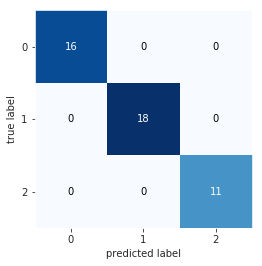

In [24]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.show()

In [25]:
print(classification_report(y2,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [0]:
#from sklearn.cluster import KMeans

In [0]:
#kmeans=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)

In [0]:
#y_ans=kmeans.fit_predict(X1)

In [0]:
#y_ans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
#from sklearn.metrics import confusion_matrix,classification_report
#cm1=confusion_matrix(y,y_ans)


In [0]:
#cm1

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])